In [350]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import glob
import re
from scipy.fftpack import dct, idct
%matplotlib inline

In [351]:
#fileName='/Users/xy-work/Programs/input/Durham_raw/bayer000000.raw'
#fileName='../rawout/00001.raw'
fileName = './00100.raw'
#fileName='./nvcamtest.raw'
xs=0; ys=0
Nx=2160; Ny=3840
#Nx=2048;
xe=xs+Nx; ye=ys+Ny
pop=np.fromfile(fileName,dtype=np.dtype('i2'))

In [352]:
np.shape(pop)

(8294400,)

In [353]:
pop

array([326, 333, 318, ..., 264, 420, 258], dtype=int16)

In [354]:
#pop=pop[250416:]
#pop=pop[0:3864*2174]
pop=pop[0:3840*2160]
#pop=pop[0:3856*2160]
print("shape: " + str(pop.shape))

shape: (8294400,)


In [355]:
pop

array([326, 333, 318, ..., 264, 420, 258], dtype=int16)

In [356]:
#pop=np.reshape(pop,(2174,3864))
pop=np.reshape(pop,(2160,3840))
print("shape: " + str(pop.shape))

shape: (2160, 3840)


In [357]:
pop=np.rot90(np.rot90(pop))
print("shape: " + str(pop.shape))

shape: (2160, 3840)


In [358]:
pop[0:1,:]

array([[258, 420, 264, ..., 622, 341, 609]], dtype=int16)

In [359]:
pop[:,0:1]

array([[258],
       [409],
       [267],
       ...,
       [557],
       [335],
       [567]], dtype=int16)

In [360]:
pop

array([[258, 420, 264, ..., 622, 341, 609],
       [409, 360, 432, ..., 606, 608, 584],
       [267, 440, 270, ..., 615, 342, 597],
       ...,
       [557, 459, 562, ..., 329, 359, 322],
       [335, 569, 348, ..., 354, 220, 346],
       [567, 460, 571, ..., 318, 333, 326]], dtype=int16)

In [361]:
pop=pop[xs:xe,ys:ye]
print("shape: " + str(pop.shape))

shape: (2160, 3840)


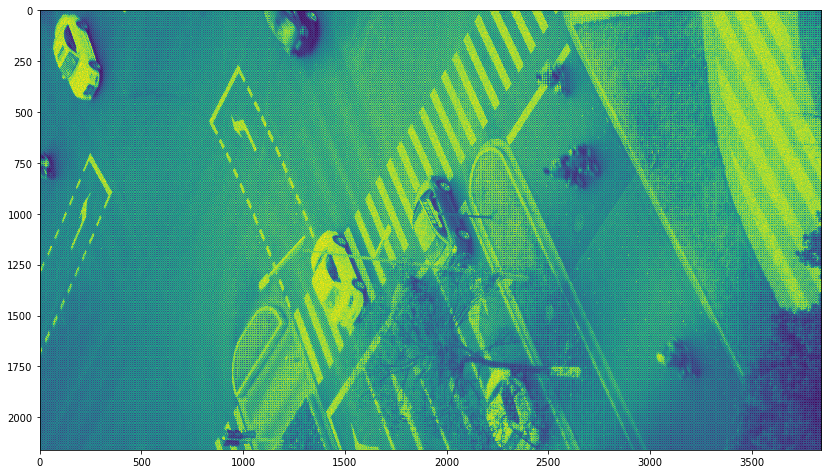

In [362]:
plt.figure(figsize=(14, 18))
plt.imshow(pop)

In [363]:
print("pop shape= " + str(pop.shape) + " , max= " + str(np.max(pop)) 
      + " , min= " + str(np.min(pop)) + " , mean= " + str(np.mean(pop)))

pop shape= (2160, 3840) , max= 1023 , min= 172 , mean= 637.1183878279321


In [364]:
pop=pop/(np.power(2,10))

In [320]:
print("pop shape= " + str(pop.shape) + " , max= " + str(np.max(pop)) 
      + " , min= " + str(np.min(pop)) + " , mean= " + str(np.mean(pop)))

pop shape= (2160, 3840) , max= 0.9990234375 , min= 0.16796875 , mean= 0.622185925613215


In [321]:
import h5py
def write_hdf5(x,filename):
    with h5py.File(filename, 'w') as h:
        h.create_dataset('data', data=x, shape=x.shape) 

In [302]:
write_hdf5(pop,'image_orig.h5')